In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df['average'] = (df['math score'] + df['reading score'] + df['writing score'])/3
df['result'] = df['average'].apply(lambda x: 1 if x>=50 else 0)

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,result
0,0,1,1,1,1,72,72,74,72.666667,1
1,0,2,4,1,0,69,90,88,82.333333,1
2,0,1,3,1,1,90,95,93,92.666667,1
3,1,0,0,0,1,47,57,44,49.333333,0
4,1,2,4,1,1,76,78,75,76.333333,1


In [4]:
X = df.drop(['average','result'], axis=1)
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = RandomForestClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


Accuracy: 0.995
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.99      1.00      1.00       173

    accuracy                           0.99       200
   macro avg       1.00      0.98      0.99       200
weighted avg       1.00      0.99      0.99       200



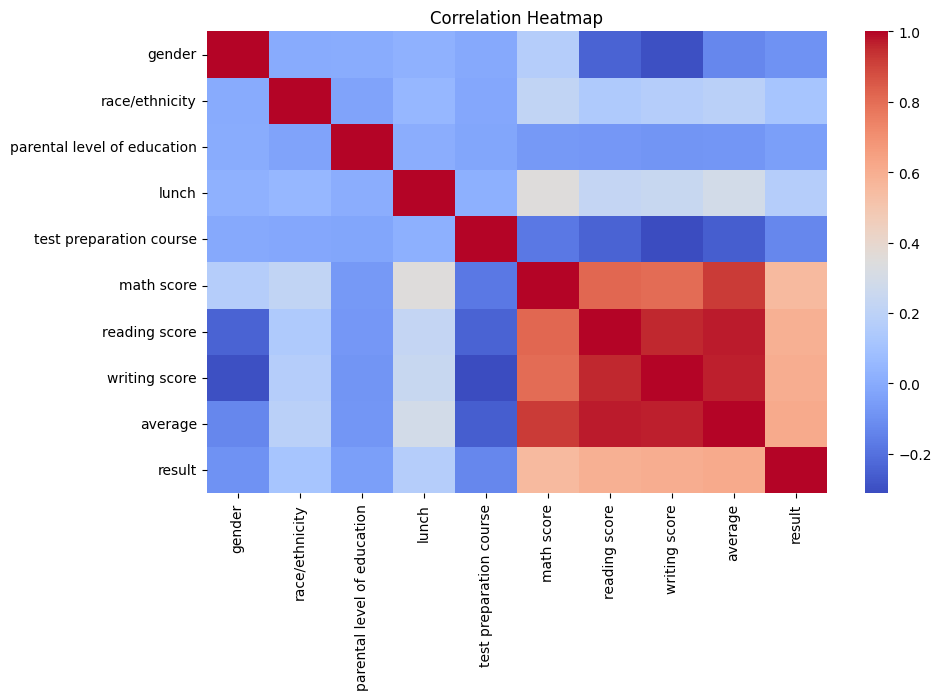

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig("heatmap.png")
plt.show()
